In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/heart.csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,725
F,193


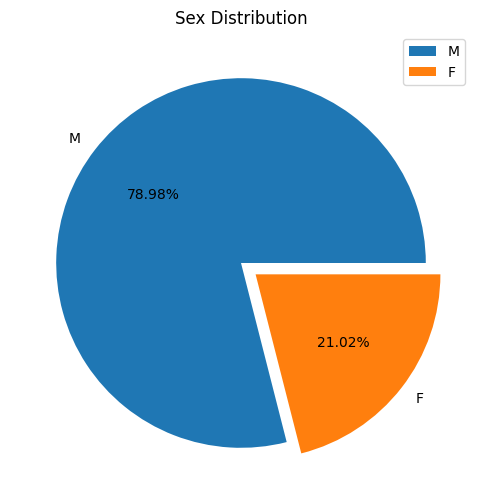

In [ ]:
plt.figure(figsize=(10, 6))
plt.pie(x=df['Sex'].value_counts(), labels=df['Sex'].value_counts().index, autopct="%1.2f%%", explode=[0, 0.1])
plt.title('Sex Distribution')
plt.legend()

plt.show()

In [ ]:
df['Age'].value_counts()

,count
Age,
54,51
58,42
55,41
56,38
57,38
52,36
62,35
59,35
51,35


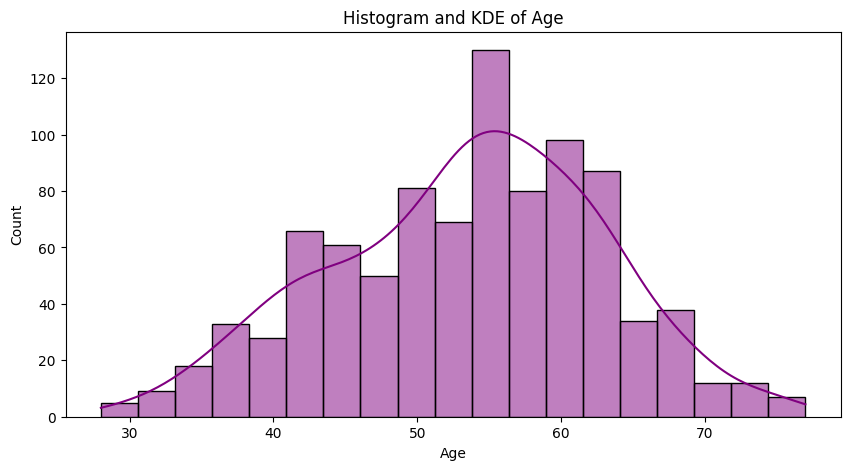

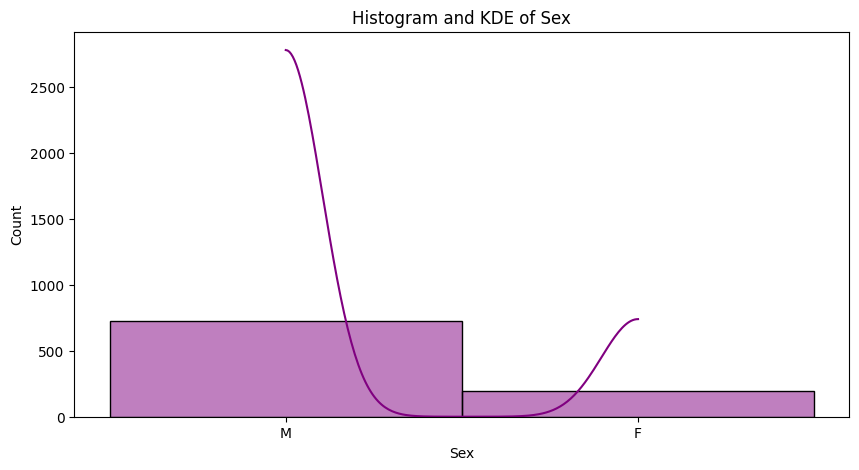

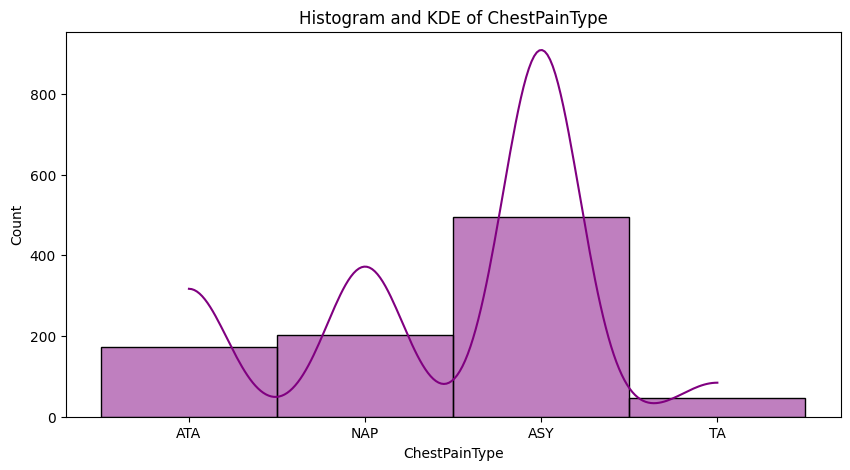

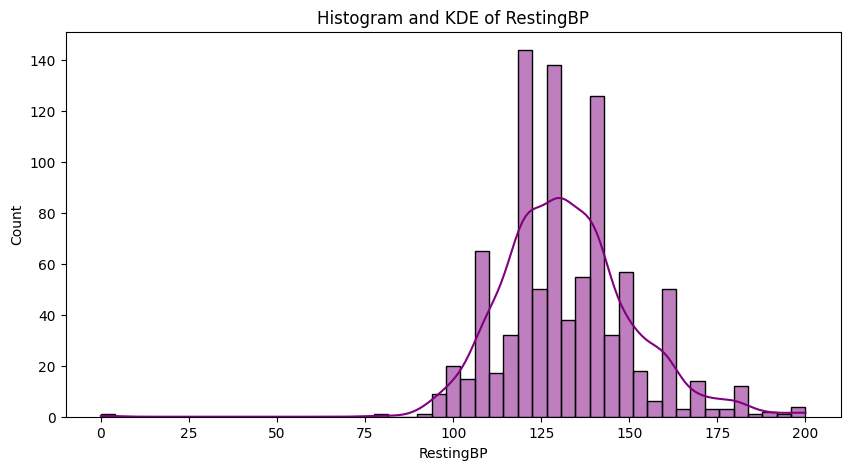

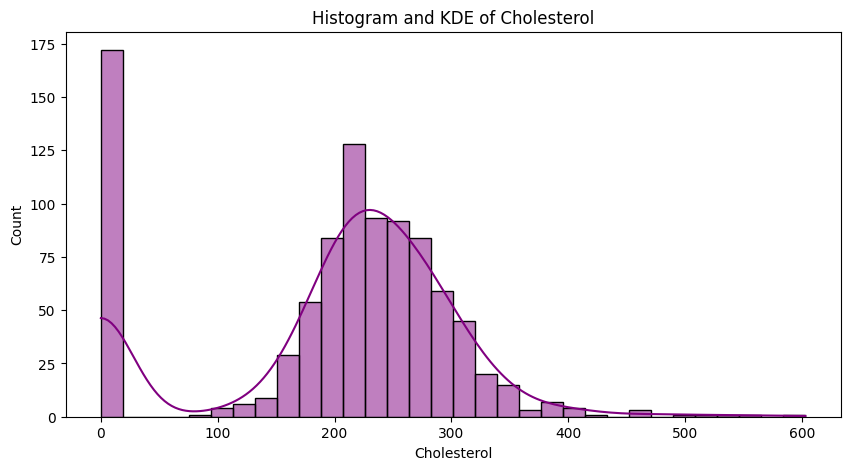

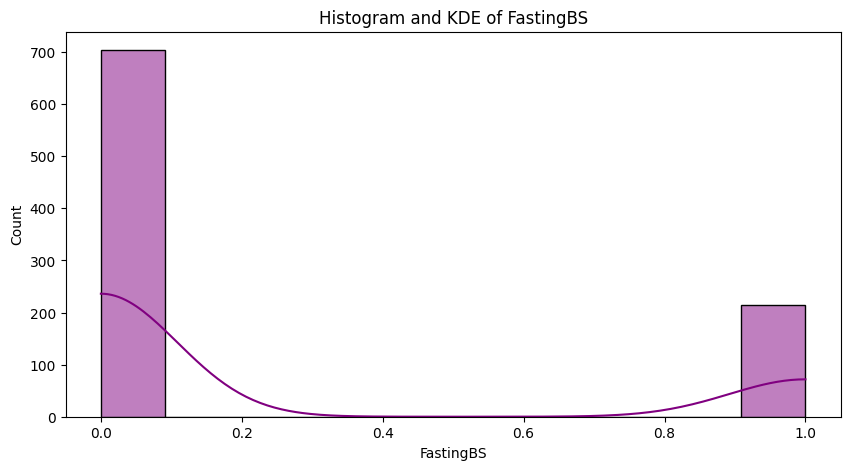

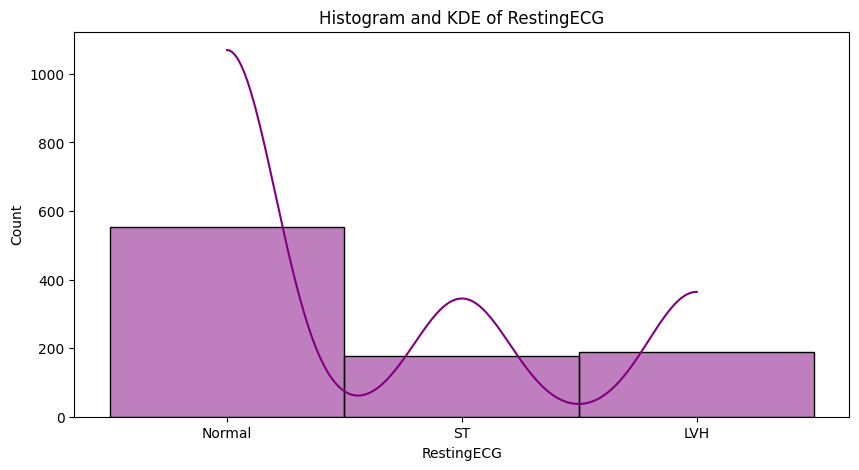

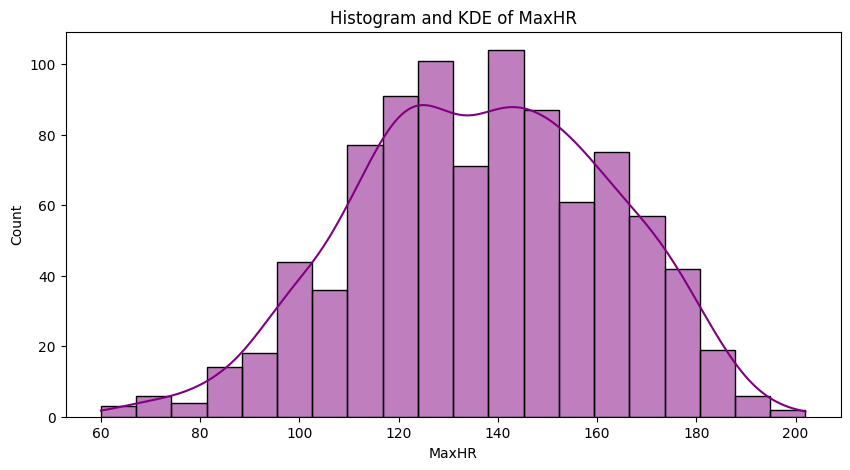

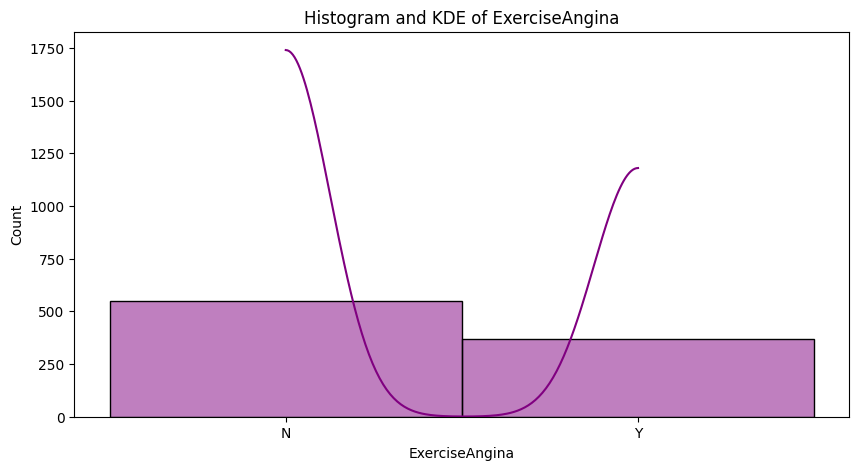

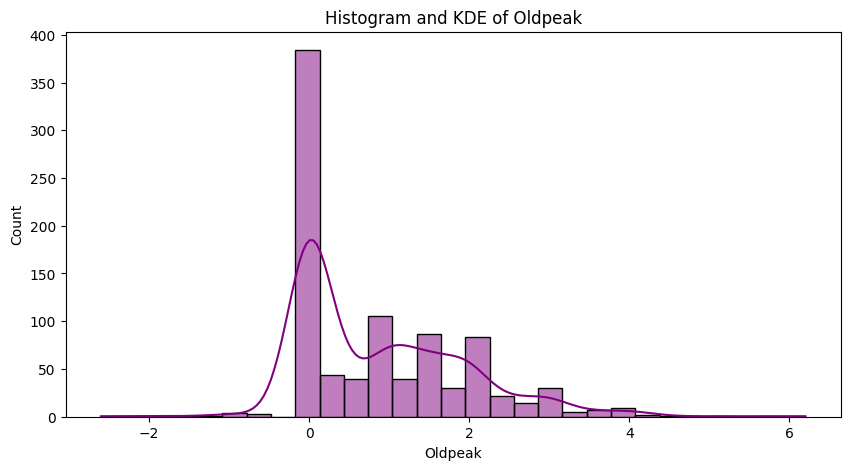

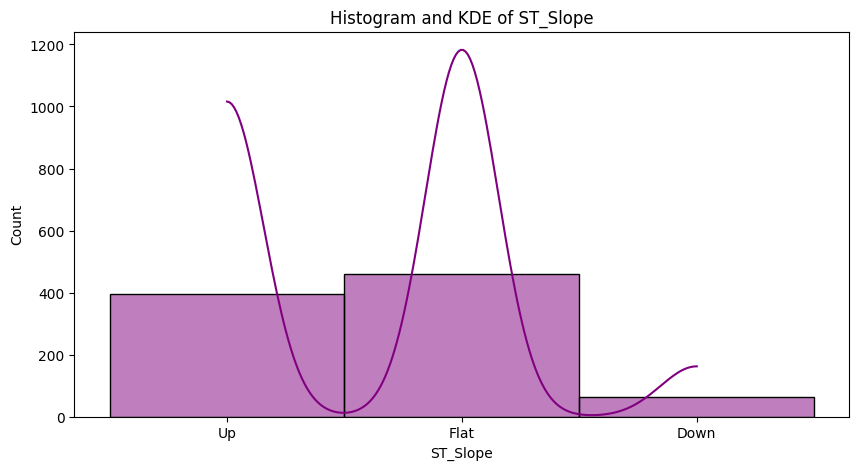

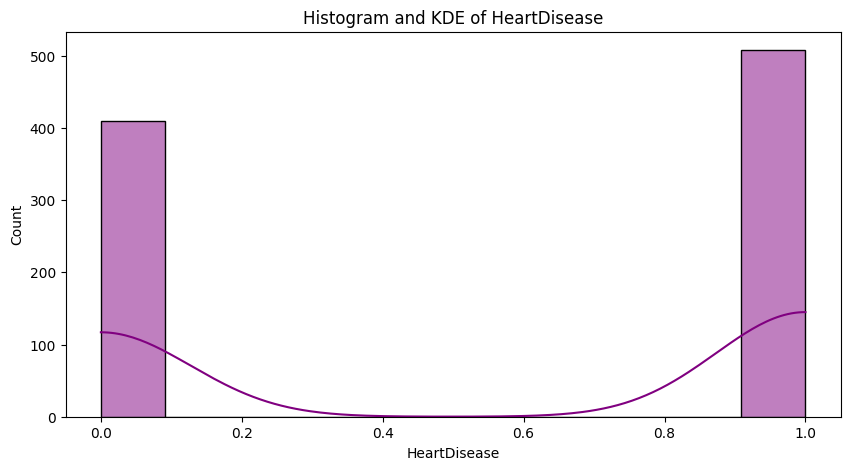

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10,5))
    sns.histplot(df[col],kde=True,color='purple')
    plt.title(f'Histogram and KDE of {col}')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex']=le.fit_transform(df['Sex'])
df['ExerciseAngina']=le.fit_transform(df['ExerciseAngina'])
df=pd.get_dummies(df,columns=['ChestPainType','ST_Slope','RestingECG'],drop_first=True)

In [ ]:
df.head()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up,RestingECG_Normal,RestingECG_ST
0,40,1,140,289,0,172,0,0.0,0,True,False,False,False,True,True,False
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,False,True,True,False


Text(0.5, 1.0, 'correlation Matix')

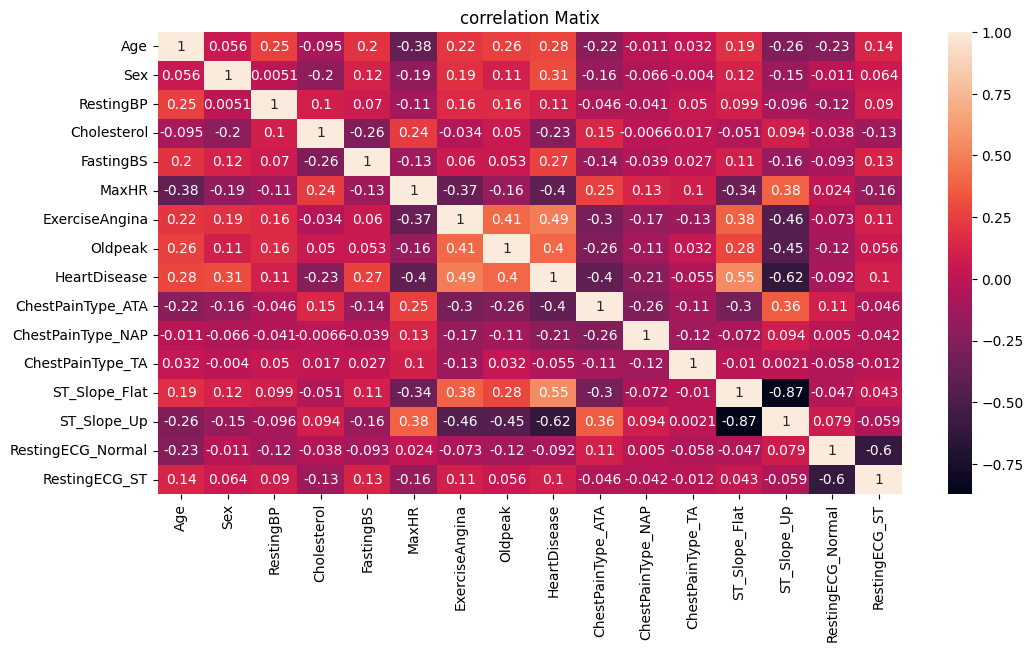

In [ ]:
plt.figure(figsize=(12,6))
corr_matrix=df.corr()
sns.heatmap(corr_matrix,annot=True)
plt.title("correlation Matix")

In [ ]:
from sklearn.preprocessing import StandardScaler
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'Oldpeak']
scaler=StandardScaler()

df[numeric_features] = scaler.fit_transform(df[numeric_features])

X_selected = df.drop(columns=['HeartDisease'])
y = df['HeartDisease']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_rf=RF.predict(X_test)
accuracy_score(Y_test,y_pred_rf)

0.8768115942028986